<a href="https://colab.research.google.com/github/jh0n3/at01/blob/master/Jhonathan_at04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dados de Árvores emergentes na Amazônia Brasileira**

* Dataset contendo atributos oriundos de um Modelo Digital de Terreno (MDT) bem como a localização de árvores que se elevam além do dossel florestal, ditas árvores emergentes, na Amazônia brasileira.
* Os atributos topográficos (numéricos) são:
 * Elevação (altitude) - DTM
 * Indice Topográfico de Umidade - TWI
 * Declividade - SLP
 * Aspecto (azimute da declividade) - ASP
 * Distância horizontal até o corpo dágua mais próximo - HDI
 * Distância vartical até o corpo dágua mais próximo - VDI
 * Índice de Roustez Topográfica - RGX
 * Índice de Posição Topográfica - TPI
 * Índice de Convergência Topográfica - TCI
 * Direção de Fluxo de água - DIR
 * Índice de Rugosidade Topográfica - TRI
* 632 instâncias

* O dataset está balanceado, pois existem 50% de ocorrenica de Arvores Emergentes (AE) e 50% de Arvores nãop Emergentes (ANE)

**Montando o ambiente no Google Drive**


In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


## 1. Importar bibliotecas necessárias

In [2]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


## 2. Lendo os dados

In [3]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/ML_jh0n3/emergentesP50_corrClean.csv')
dados.head()

,EMERGENTE,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,0,52.877316,5.646127,1.115717,225.000000,268.882263,0.858570,-0.005764,8.405160
1,0,76.121002,0.458159,13.319283,196.762161,250.362488,27.497246,0.408562,-0.427912
2,0,62.663570,5.795762,2.120610,208.456863,409.534058,3.184376,-0.008343,3.405835
3,0,66.057808,2.950522,32.357330,327.166534,304.391907,16.927715,0.187172,2.162333
4,0,69.429962,4.540288,24.646606,143.793945,99.468040,19.007271,-0.007156,3.556503


## 3. Limpeza e organização dos dados

In [12]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [5]:
#excluir colunas irrelevantes
#dados = dados.drop(columns=['RDM','RGX','DIR, 'TRI'])
#dados.head()

## 4. Reescalonamento dos dados

In [6]:
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,EMERGENTE,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,0.0,0.091426,0.508997,0.020933,0.633415,0.258782,0.015793,0.398346,0.716769
1,0.0,0.494000,0.022587,0.249899,0.553921,0.240769,0.518095,1.000000,0.059528
2,0.0,0.260921,0.523027,0.039787,0.586843,0.395590,0.059649,0.394601,0.344785
3,0.0,0.319708,0.256264,0.607093,0.921032,0.293321,0.318795,0.678514,0.252260
4,0.0,0.378113,0.405317,0.462424,0.404806,0.093998,0.358007,0.396324,0.355996


## 5. Organizando dados para modelagem

### Dividir os dados em atributos descritores e atributo de classe (target)

In [7]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,0.091426,0.508997,0.020933,0.633415,0.258782,0.015793,0.398346,0.716769
1,0.494000,0.022587,0.249899,0.553921,0.240769,0.518095,1.000000,0.059528
2,0.260921,0.523027,0.039787,0.586843,0.395590,0.059649,0.394601,0.344785
3,0.319708,0.256264,0.607093,0.921032,0.293321,0.318795,0.678514,0.252260
4,0.378113,0.405317,0.462424,0.404806,0.093998,0.358007,0.396324,0.355996


In [8]:
y = dados.EMERGENTE
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: EMERGENTE, dtype: float64

## **6. Definindo o algoritmo de agrupamento**

### Criando o modelo e ajustando aos dados

In [10]:
#agrupamento
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Aplicando o modelo aos dados de teste

In [11]:
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

### Visualizando os resultados do agrupamento

In [15]:
X = X.reset_index(drop=True)

In [16]:
# adicionando as labels ao teste para fins de visualização
grupos = pd.DataFrame(kmeans_labels)
X.insert((X.shape[1]),'EMERGENTE',grupos)

In [17]:
ANE = X[X['EMERGENTE']==0]
AE = X[X['EMERGENTE']==1]

In [18]:
plt.rcParams["figure.figsize"] = (8,5)

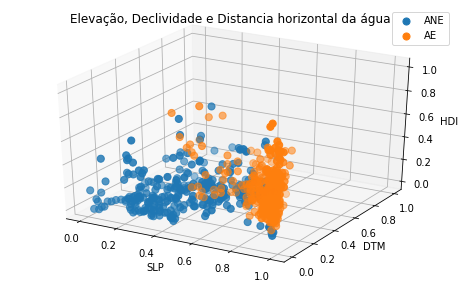

In [20]:
#plotando alguns atributos das classes
ax = plt.axes(projection='3d')
ax.scatter3D(ANE.DTM,ANE.SLP,ANE.HDI,s=50,label='ANE')
ax.scatter3D(AE.DTM,AE.SLP,AE.HDI,s=50,label='AE')

plt.legend()
ax.set_xlabel('DTM')
ax.set_ylabel('SLP')
ax.set_zlabel('HDI')
plt.title('Elevação, Declividade e Distancia horizontal da água')
plt.show()

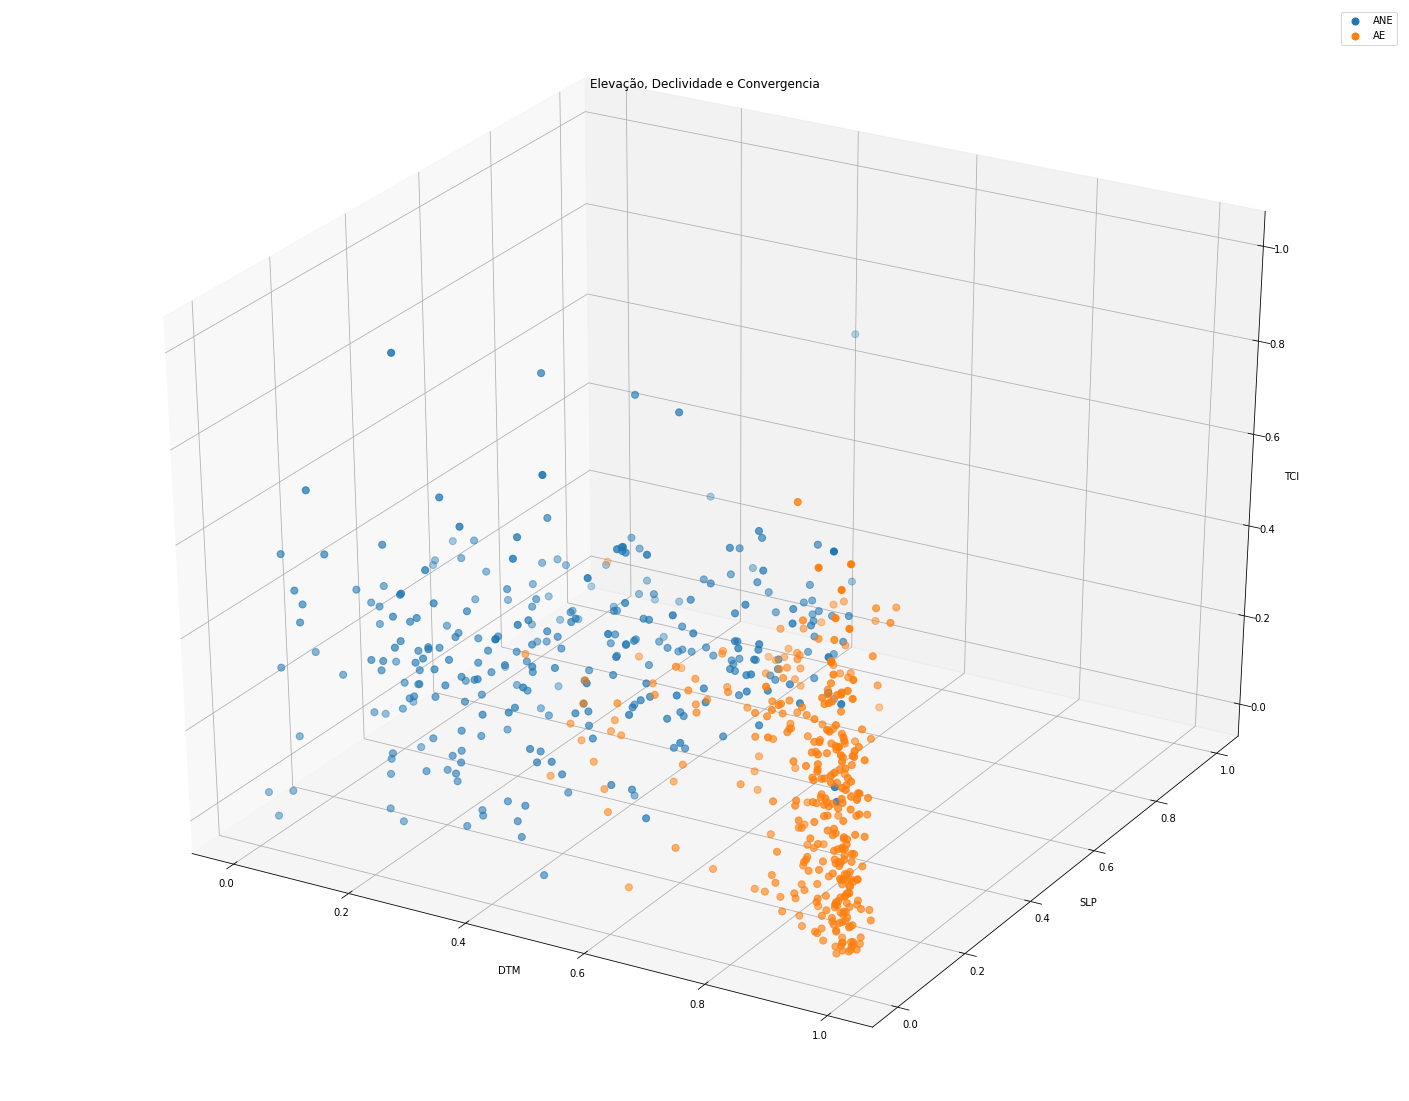

In [31]:
ax = plt.axes(projection='3d')
ax.scatter3D(ANE.DTM,ANE.SLP,ANE.TCI,s=50,label='ANE')
ax.scatter3D(AE.DTM,AE.SLP,AE.TCI,s=50,label='AE')

plt.legend()
ax.set_xlabel('DTM')
ax.set_ylabel('SLP')
ax.set_zlabel('TCI')
plt.title('Elevação, Declividade e Convergencia')
plt.show()

In [32]:
plt.rcParams["figure.figsize"] = (25,20)

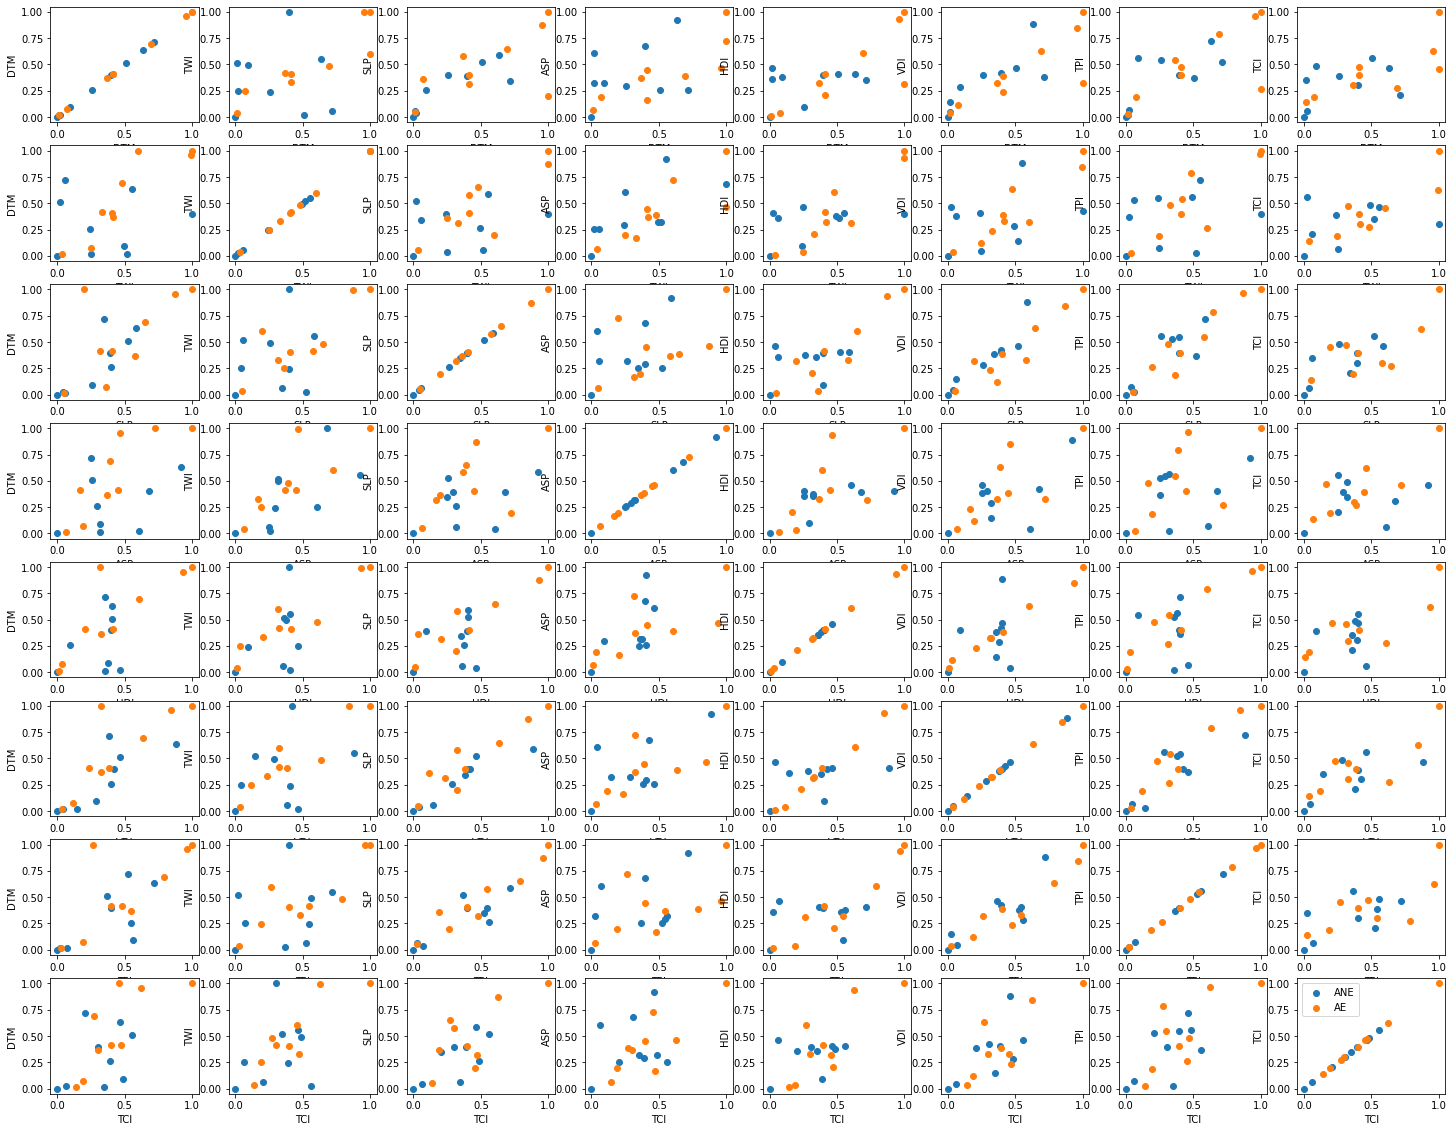

In [33]:
#plotando comparação de alguns atributos
fig, axs = plt.subplots(8,8)
for i in range(8):
  for j in range(8):
    axs[i,j].scatter(ANE.iloc[i],ANE.iloc[j],label='ANE')
    axs[i,j].scatter(AE.iloc[i],AE.iloc[j],label='AE')
    axs[i,j].set(xlabel=X.columns[i],ylabel=X.columns[j])
plt.legend()
plt.show()

## 6. Avaliação do Modelo

In [34]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [35]:
acuracia = accuracy_score(y,kmeans_labels)
round(acuracia,3)

0.498

**Comentários:** 
Observa-se que a acurácia do modelo atinge o score de 49.8 %. Portanto 49.8% das instâncias foram agrupadas corretamente, caso a ocorrencia de árvores emergentes (AE) coincida com a rotulação realizada pelo modelo. Caso contrário esse valor de 49.8% se refere à taxa de erro. porém diante da proximidade da acurácia da aleatoriedade 50%, essa diferença se torna irrelevante. *texto em itálico*

In [29]:
#calculando o indice de Rand Ajustado
from sklearn.metrics import adjusted_rand_score

In [30]:
rand_score = adjusted_rand_score(y,kmeans_labels)
rand_score

-0.0015702501684914858

**Comentários:** 
O indice de Rand observado foi -0.00157, o que indica um mal agrupamento.

In [36]:
#calculando o score baseado em informações múltiplas
from sklearn.metrics import adjusted_mutual_info_score

In [37]:
mutual_info = adjusted_mutual_info_score(y,kmeans_labels)
mutual_info

-0.0011399709294870027

**Comentários:**
O score baseado em informação mútua obtido (-0.00114), corroborando com o indice de Rand indicando um mal agrupamento.

In [39]:
#calculando o score de Fowlkes-Mallows
from sklearn.metrics import fowlkes_mallows_score

In [40]:
fm = fowlkes_mallows_score(y,kmeans_labels)
fm

0.49952758584275475

**Comentários:**
O score Fowlkes-Mallows foi 49.9%, indica, tal quala acurácia, indicando um mal agrupamento, uma vez que a proximidade de 50% sugere aleatoriedade ao modelo.

In [ ]:
X = X.drop(columns=['EMERGENTE'])


In [ ]:
#métricas em classes desconhecidas

#Indice de Davies-Boldin 
from sklearn.metrics  import davies_bouldin_score

In [ ]:
db = davies_bouldin_score(X,kmeans_labels)
db

1.396391546827194

In [ ]:
#Coeficiente de Silhueta
from sklearn.metrics import silhouette_score

In [48]:
ss = silhouette_score(X,kmeans_labels,metric='euclidean')
ss

0.28112796506323784

In [49]:
#indice de Calinski-Harabasz 
from sklearn.metrics import calinski_harabasz_score


In [50]:
ch = calinski_harabasz_score(X,kmeans_labels)
ch

296.31914972364603

**Scores em Agrupamento hierárquico**

In [61]:
hierarquico = AgglomerativeClustering(n_clusters=2)
labels_hierarquico = hierarquico.fit(X).labels_

In [62]:
#acurácia
acuracia = accuracy_score(y,labels_hierarquico)
round(acuracia,3)

0.497

In [63]:
#índice rand ajustado
rand_score = adjusted_rand_score(y,labels_hierarquico)
rand_score

-0.001497256121907644

In [65]:
#índice baseado em informação mútua
mutual_info = adjusted_mutual_info_score(y,labels_hierarquico)
mutual_info

-0.001128516797581833

In [66]:
#índice Fowlkes Mallows
fm = fowlkes_mallows_score(y,labels_hierarquico)
fm

0.5062720638413901

In [67]:
#indice Davies-Boldin
db = davies_bouldin_score(X,labels_hierarquico)
db

1.4601118360725316

In [68]:
#coeficiente de silhueta
ss = silhouette_score(X,labels_hierarquico,metric='euclidean')
ss

0.25438375632987764

In [69]:
#indice de Calinski-Harabasz
ch = calinski_harabasz_score(X,labels_hierarquico)
ch

255.56986556609863

**Comentários:** 
Valores semelhantes foram encontrados no uso do K-means ou agrupamento Hierárquico, tento na avaliação considerando o Atributo de classe quanto na simulação de classe desconhecidas. 
No caso das classes desconhecidas, o k-means demonstrou pequena vantagem sobre o agrupamento hierárquico (ss: 0.28 - 0.25; ch: 296 - 255.6)

## **Comentários finais:**
O método de agrupamento desencorajam o uso do dataset  para a modelagem de árvores emergentes, uma vez que scores ruins ou próximos a aleatoriedade são constates nas métricas utilizadas para o k-means e agrupamento hierárquico.